# Imports

In [32]:
#imports
import pandas as pd
import numpy as np
import h5py
import hdf5plugin


# Data Exploration



## Metadata

In [12]:
# Citeseq Metadata
file_path = 'metadata/metadata.csv'
df = pd.read_csv(file_path)
df_citeseq = df[df['technology']=='citeseq'] # Only keeping data for citeseq
# print(df.shape) # (281528, 5)
df_citeseq.drop('technology', axis=1, inplace=True)
print(df_citeseq)

             cell_id  day  donor cell_type
0       c2150f55becb    2  27678       HSC
1       65b7edf8a4da    2  27678       HSC
2       c1b26cb1057b    2  27678      EryP
3       917168fa6f83    2  27678      NeuP
4       2b29feeca86d    2  27678      EryP
...              ...  ...    ...       ...
119646  a9b4d99f1f50    7  31800       HSC
119647  0e2c1d0782af    7  31800       HSC
119648  a3cbc5aa0ec3    7  31800       MkP
119649  75b350243add    7  31800      EryP
119650  ad5a949989b2    7  31800      EryP

[119651 rows x 4 columns]


/var/folders/zd/7b_1605533jc2fn8r8mhmtnw0000gn/T/ipykernel_55128/1824312801.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_citeseq.drop('technology', axis=1, inplace=True)


## CITESeq Targets

In [20]:
train_targets = "data/train_cite_targets.h5"
f = h5py.File(train_targets,'r')

```
>>> f['train_cite_targets'].keys()
['axis0', 'axis1', 'block0_items', 'block0_values']
```
axis0 is the protein names. 

axis1 is ???

block0_items is also gene ids, same as axis0

axis1 is a matrix. rows are gene ids and cols ???


```
f['train_cite_targets']['axis0'].shape            # (140,)
f['train_cite_targets']['axis1'].shape            # (70988,)
f['train_cite_targets']['block0_items'].shape     # (140,)
f['train_cite_targets']['block0_values'].shape    # (70988, 140)
```

In [14]:
col_names =list(f['train_cite_targets']['axis0'])
col_names = [s.decode('ascii') for s in col_names]

row_names =list(f['train_cite_targets']['axis1'])[:500]
row_names = [s.decode('ascii') for s in row_names]

In [15]:
# Store first 500 rows of the targets file
small_targets = f['train_cite_targets']['block0_values'][:500,:] 
pd.DataFrame(small_targets, index=row_names).to_csv("data/small_targets.csv", header=col_names, index=row_names)

In [16]:
f.close()

In [21]:
f['train_cite_targets']['axis1'][:5]
# f['train_cite_targets']['block0_items'].shape

array([b'45006fe3e4c8', b'd02759a80ba2', b'c016c6b0efa5', b'ba7f733a4f75',
       b'fbcf2443ffb2'], dtype='|S12')

In [ ]:
print(df_citeseq['cell_id'])
# print(df['cell_id'])
print('c2150f55becb'  in df['cell_id'].values[0]) # Sanity check that we can search for cell ids
print('45006fe3e4c8' in df['cell_id'].values[0]) # first value in axis1 not found in cite['cell_ids']

0         c2150f55becb
1         65b7edf8a4da
2         c1b26cb1057b
3         917168fa6f83
4         2b29feeca86d
              ...     
119646    a9b4d99f1f50
119647    0e2c1d0782af
119648    a3cbc5aa0ec3
119649    75b350243add
119650    ad5a949989b2
Name: cell_id, Length: 119651, dtype: object
True
False


## CITESeq Inputs

In [10]:
train_inputs = "data/train_cite_inputs.h5"
f = h5py.File(train_inputs,'r')

In [11]:
print(f['train_cite_inputs'].keys())

<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>


```
print(f['train_cite_inputs']['axis0'].shape)            # (22050,)
print(f['train_cite_inputs']['axis1'].shape)            # (70988,)
print(f['train_cite_inputs']['block0_items'].shape)     # (22050,)
print(f['train_cite_inputs']['block0_values'].shape)    # (70988, 22050)
```

In [12]:
col_names =list(f['train_cite_inputs']['axis0'])
col_names = [s.decode('ascii') for s in col_names]

row_names =list(f['train_cite_inputs']['axis1'])[:500]
row_names = [s.decode('ascii') for s in row_names]

In [45]:
# Store first 500 rows of the targets file
small_inputs = f['train_cite_inputs']['block0_values'][:500,:] 
pd.DataFrame(small_inputs, index=row_names).to_csv("data/small_inputs.csv", header=col_names, index=row_names)


In [46]:
f.close()

In [47]:
f['train_cite_inputs']['axis1'][0:5]

ValueError: Invalid location identifier (invalid location identifier)

In [ ]:
f['train_cite_inputs']['block0_values'][0,0]

NameError: name 'f' is not defined

# Loading in small csv

In [ ]:
train_targets = pd.read_csv('data/small_targets.csv', index_col=0)
train_targets.head()

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
45006fe3e4c8,1.167803,0.622530,0.106959,0.324989,3.331674,6.426001,1.480766,-0.728391,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518925,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021594,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407672
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675091,5.259685,-0.835379,9.631781,1.765445


In [64]:
train_inputs = pd.read_csv('data/small_inputs.csv', index_col=0)
train_inputs.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436847,3.436847,0.000000,0.0,...,3.436847,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436847,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196827,0.000000,0.0,...,0.000000,4.196827,4.196827,4.196827,0.0,0.0,3.51861,4.196827,3.518610,0.0


# Feature Reduction

In [8]:
df_metadata = pd.read_csv("metadata/metadata.csv")
df_meta_citeseq = df_metadata.loc[df_metadata.technology=="citeseq"]
x = list([13176,31800,32606]) # note:  donors 13176, 31800, and 32606 (train), 27678 (test)
y = list([2,3,4]) # day 2,3,4 in train set, day 7 test set
df_meta_citeseq_subset = pd.DataFrame(columns=df_meta_citeseq.columns)

for donor in x:
    for day in y:
        df = df_meta_citeseq.loc[(df_meta_citeseq.donor == donor) & (df_meta_citeseq.day == day)]
        df = df.iloc[:1000, :]
        df_meta_citeseq_subset = pd.concat([df_meta_citeseq_subset, df], axis=0, ignore_index=True)
        

df_meta_citeseq_subset.head()

,cell_id,day,donor,cell_type,technology
0,08a6f9047e1f,2,13176,NeuP,citeseq
1,dc33db8b968f,2,13176,EryP,citeseq
2,bb17cbbb7869,2,13176,HSC,citeseq
3,608afab25c95,2,13176,HSC,citeseq
4,f0a5edc0a949,2,13176,NeuP,citeseq


In [13]:
gene_id = f['train_cite_inputs']['axis0'][:]
type(gene_id[1]) # numpy bytes
str_gene_id = [gene_id[i].decode('UTF-8') for i in range(22050)]

list_genes_names = [t.split('_')[1] for t in str_gene_id ]
list_genes_ids = [t.split('_')[0] for t in str_gene_id ]

cell_id = f['train_cite_inputs']['axis1'][:]
str_cell_id = [cell_id[i].decode('UTF-8') for i in range(70988)]

index = [str_cell_id.index(id) for id in df_meta_citeseq_subset.cell_id]
index.sort() # array can only be accessed with ordered index
x = f['train_cite_inputs']['block0_values'][index]
x.shape

new_cell_order = [str_cell_id[i] for i in index] # retrieving the current order of cell id in df
df_cite_input = pd.DataFrame(x, columns=str_gene_id, index=new_cell_order)

# updating metadata with the same cell id order as the subset df
df_meta_citeseq_subset = df_meta_citeseq_subset.set_index('cell_id')
df_meta_citeseq_subset = df_meta_citeseq_subset.reindex(new_cell_order)  



In [14]:
df_meta_citeseq_subset.head()

,day,donor,cell_type,technology
cell_id,,,,
45006fe3e4c8,2,32606,HSC,citeseq
d02759a80ba2,2,32606,HSC,citeseq
c016c6b0efa5,2,32606,EryP,citeseq
ba7f733a4f75,2,32606,NeuP,citeseq
fbcf2443ffb2,2,32606,EryP,citeseq


In [16]:
df_cite_input.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [85]:
#data1 = pd.read_csv('data/small_inputs.csv')
#data1.isnull().sum()/len(data1)*100
#data1.shape

(500, 22051)

In [18]:
df_cite_input.isnull().sum()/len(df_cite_input)*100

ENSG00000121410_A1BG        0.0
ENSG00000268895_A1BG-AS1    0.0
ENSG00000175899_A2M         0.0
ENSG00000245105_A2M-AS1     0.0
ENSG00000166535_A2ML1       0.0
                           ... 
ENSG00000198455_ZXDB        0.0
ENSG00000070476_ZXDC        0.0
ENSG00000162378_ZYG11B      0.0
ENSG00000159840_ZYX         0.0
ENSG00000074755_ZZEF1       0.0
Length: 22050, dtype: float64

In [19]:
import sklearn
from sklearn.preprocessing import normalize
df_cite_input = df_cite_input.iloc[: , 1:]
df_cite_input.shape


(9000, 22049)

In [20]:
#normalized = normalize(data1)
#data_scaled = pd.DataFrame(normalized)
variance = df_cite_input.var()
variance.head

<bound method NDFrame.head of ENSG00000268895_A1BG-AS1    0.730526
ENSG00000175899_A2M         0.064410
ENSG00000245105_A2M-AS1     0.648599
ENSG00000166535_A2ML1       0.003587
ENSG00000128274_A4GALT      0.350743
                              ...   
ENSG00000198455_ZXDB        0.722937
ENSG00000070476_ZXDC        2.635664
ENSG00000162378_ZYG11B      3.229373
ENSG00000159840_ZYX         4.332095
ENSG00000074755_ZZEF1       2.615005
Length: 22049, dtype: float32>

<AxesSubplot: ylabel='Frequency'>

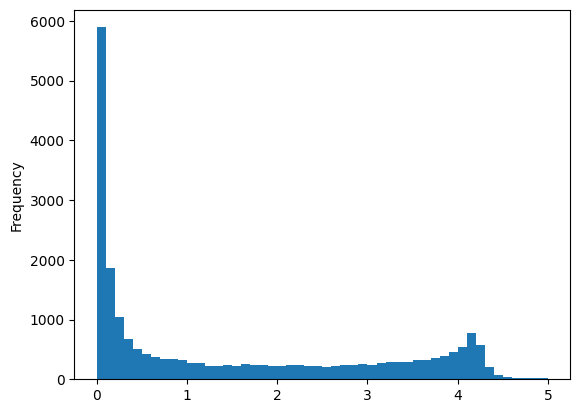

In [27]:
import matplotlib
variance.plot.hist(bins=50, range = [0,5])


In [41]:
import matplotlib as plt
columns = df_cite_input.columns
data = [ ]
index = np.arange(0, 2.0, 0.1).tolist()

# function to determine number of features left for different variance threshold
for x in range (0,20):
    variable = [ ]
    for i in range(0,len(variance)):
        if variance[i]>= (x/10): #setting the threshold as 0-2%
            variable.append(columns[i])
    data.append(len(variable))
df_var_threshold = pd.DataFrame(data, index = index)

print(df_var_threshold)

#reduced_data = df_cite_input[variable]
#reduced_data.head()

         0
0.0  22049
0.1  16155
0.2  14292
0.3  13250
0.4  12569
0.5  12065
0.6  11638
0.7  11261
0.8  10918
0.9  10582
1.0  10263
1.1   9987
1.2   9720
1.3   9502
1.4   9276
1.5   9042
1.6   8824
1.7   8569
1.8   8336
1.9   8094


<AxesSubplot: >

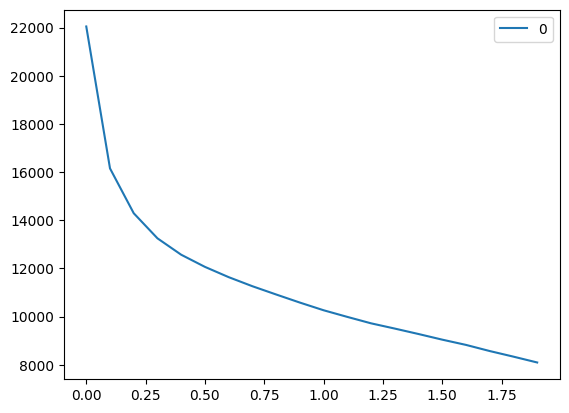

In [42]:
# line graph to determine what threshold to choose
df_var_threshold.plot.line()

In [45]:
variable = [ ]
for i in range(0,len(variance)):
        if variance[i]>= 0.5: #setting the threshold as 0.5%
            variable.append(columns[i])
reduced_data = df_cite_input[variable]
reduced_data.head()

reduced_data.to_csv("data/variance_filtered.csv")

# MAGIC

In [ ]:
import magic
import scprep

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt




# Old code

In [ ]:
for k,v in f['train_multi_targets'].items():
    print(f'key of <f[\'train_multi_targets\']>: {k}')
    print(f['train_multi_targets'][k])
    # print(help(f['train_multi_targets'][k]))



key of <f['train_multi_targets']>: axis0
<HDF5 dataset "axis0": shape (23418,), type "|S15">
key of <f['train_multi_targets']>: axis1
<HDF5 dataset "axis1": shape (105942,), type "|S12">
key of <f['train_multi_targets']>: block0_items
<HDF5 dataset "block0_items": shape (23418,), type "|S15">
key of <f['train_multi_targets']>: block0_values
<HDF5 dataset "block0_values": shape (105942, 23418), type "<f4">


In [ ]:
help(f['train_multi_targets']['axis0'])


Help on Dataset in module h5py._hl.dataset object:

class Dataset(h5py._hl.base.HLObject)
 |  Dataset(bind, *, readonly=False)
 |  
 |  Represents an HDF5 dataset
 |  
 |  Method resolution order:
 |      Dataset
 |      h5py._hl.base.HLObject
 |      h5py._hl.base.CommonStateObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __array__(self, dtype=None)
 |      Create a Numpy array containing the whole dataset.  DON'T THINK
 |      THIS MEANS DATASETS ARE INTERCHANGEABLE WITH ARRAYS.  For one thing,
 |      you have to read the whole dataset every time this method is called.
 |  
 |  __getitem__(self, args, new_dtype=None)
 |      Read a slice from the HDF5 dataset.
 |      
 |      Takes slices and recarray-style field names (more than one is
 |      allowed!) in any order.  Obeys basic NumPy rules, including
 |      broadcasting.
 |      
 |      Also supports:
 |      
 |      * Boolean "mask" array indexing
 |  
 |  __init__(self, bind, *, readonly=False)
 |    

In [ ]:
f['train_multi_targets']['axis0'][0]


b'ENSG00000121410'

In [ ]:
train_inputs = "data/train_multi_inputs.h5"
f_in = h5py.File(train_inputs)
for i in f:
    group = ((f[i]))


In [ ]:
group['axis0']

<HDF5 dataset "axis0": shape (23418,), type "|S15">

In [ ]:
df_multi_train_x = pd.read_hdf(train_inputs, start=0, stop=1000)

ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.

In [ ]:
df_multi_train_y = pd.read_hdf(train_targets, start=0, stop=1000)

In [ ]:
df_multi_train_y

gene_id,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,0.0,4.507936,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22f7100af78b,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.766403,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
648874e21d10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.747074,0.0,...,0.0,0.000000,0.000000,0.0,0.0,4.747074,0.0,0.000000,5.435873,0.000000
11e1bdb49257,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,4.518555,0.0,0.000000,4.518555,4.518555
